# ***Extracting And Creating Required Coulmns From The Given Datasets***

In [ ]:
import pandas as pd

# Load the original dataset
df = pd.read_csv("HDHI Admission data.csv")

# Step 1: Create 'patientid' from 'MRD No.'
df['patientid'] = df['MRD No.']

# Step 2: Clean 'AGE' column
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

# Step 3: Clean 'GENDER' column
df['GENDER'] = df['GENDER'].astype(str).str.strip().str.title()

# Step 4: Create 'admission_type' from 'TYPE OF ADMISSION-EMERGENCY/OPD'
df['admission_type'] = df['TYPE OF ADMISSION-EMERGENCY/OPD'].astype(str).str.strip().str.title()

# Step 5: Convert 'D.O.A' to datetime and extract 'admission_day'
df['D.O.A'] = pd.to_datetime(df['D.O.A'], dayfirst=True, errors='coerce')
df['admission_day'] = df['D.O.A'].dt.day_name()

# Step 6: Create 'previous_visits' by counting repeat MRD No.
visit_counts = df['MRD No.'].value_counts()
df['previous_visits'] = df['MRD No.'].map(visit_counts) - 1

# Step 7: Create 'department' based on diagnosis columns
def map_department(row):
    if row.get('HEART FAILURE', 0) == 1 or row.get('STEMI', 0) == 1:
        return 'Cardiology'
    elif row.get('CVA INFRACT', 0) == 1 or row.get('CVA BLEED', 0) == 1:
        return 'Neurology'
    elif str(row.get('CHEST INFECTION', '')).strip().lower() == 'yes':
        return 'Pulmonology'
    else:
        return 'General'

df['department'] = df.apply(map_department, axis=1)

# Step 8: Select only the required columns for EDA
cleaned_df = df[['patientid', 'AGE', 'GENDER', 'admission_type', 'department', 'admission_day', 'previous_visits']]

# Step 9: Save the cleaned dataset to a new CSV file
cleaned_df.to_csv("Cleaned_Hospital_Admissions.csv", index=False)

print("✅ Cleaned dataset saved as 'Cleaned_Hospital_Admissions.csv'")


✅ Cleaned dataset saved as 'Cleaned_Hospital_Admissions.csv'


# ***Step 1: Load the Dataset***

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Cleaned_Hospital_Admissions.csv")  # Replace with your actual file name
print(df.head())  # Show first 5 rows
print(df.info())  # Show column types and nulls


  patientid  AGE GENDER admission_type  department admission_day  \
0    234735   81      M              E  Cardiology     Wednesday   
1    234696   65      M              E     General     Wednesday   
2    234882   53      M              E  Cardiology     Wednesday   
3    234635   67      F              E     General     Wednesday   
4    234486   60      F              E     General     Wednesday   

   previous_visits  
0                0  
1                0  
2                4  
3                0  
4                0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patientid        15757 non-null  object
 1   AGE              15757 non-null  int64 
 2   GENDER           15757 non-null  object
 3   admission_type   15757 non-null  object
 4   department       15757 non-null  object
 5   admission_day    11990 non-null  obje

# ***Step 2: Clean the Data*** ***bold text***

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with any nulls in essential columns
df.dropna(subset=['AGE', 'GENDER', 'admission_type', 'department','admission_day', 'previous_visits'], inplace=True)

# Standardize column values
df['GENDER'] = df['GENDER'].str.strip().str.title()
df['admission_type'] = df['admission_type'].str.strip().str.title()
#df['room_type'] = df['room_type'].str.strip().str.title()
df['department'] = df['department'].str.strip().str.title()


patientid             0
AGE                   0
GENDER                0
admission_type        0
department            0
admission_day      3767
previous_visits       0
dtype: int64


# ***Step 3: Answer EDA Questions***

1. Total number of admissions

In [ ]:
total_admissions = df.shape[0]
print("Total Admissions:", total_admissions)


Total Admissions: 11990


2. Distribution of gender

Gender Distribution:
 GENDER
M    7598
F    4392
Name: count, dtype: int64


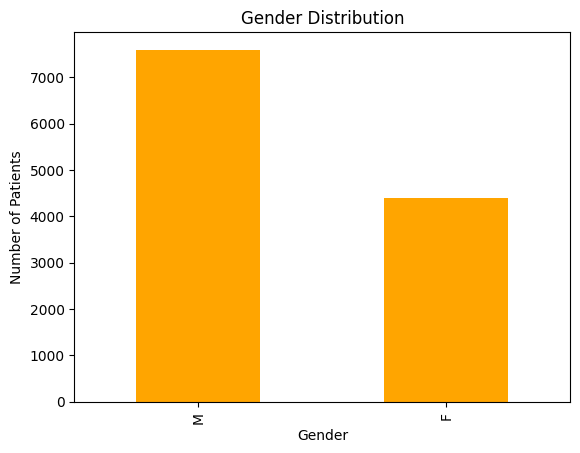

In [ ]:
gender_counts = df['GENDER'].value_counts()
print("Gender Distribution:\n", gender_counts)

# Plot
import matplotlib.pyplot as plt
gender_counts.plot(kind='bar', title="Gender Distribution", color= "orange")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.show()


3. Most frequently admitted age group

Age Group Distribution:
 AGE
0-18       55
19-35     430
36-50    1782
51-65    5197
66+      4524
Name: count, dtype: int64


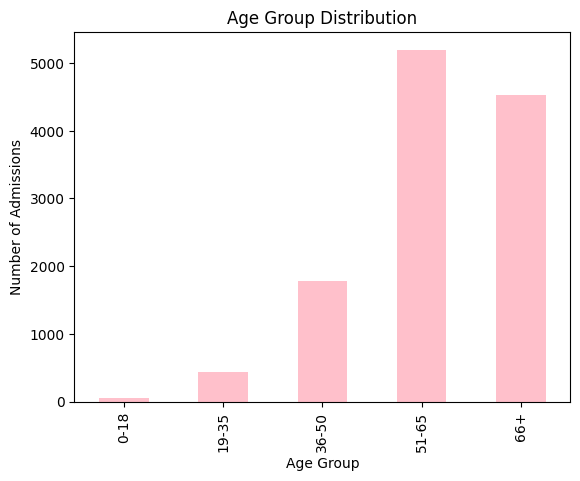

In [ ]:
# Create age groups
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['AGE'] = pd.cut(df['AGE'], bins=bins, labels=labels)

# Count age groups
age_group_counts = df['AGE'].value_counts().sort_index()
print("Age Group Distribution:\n", age_group_counts)

# Plot
age_group_counts.plot(kind='bar', title="Age Group Distribution", color= 'pink')
plt.xlabel("Age Group")
plt.ylabel("Number of Admissions")
plt.show()


4. Most common admission types

Admission Type Distribution:
 admission_type
E    8292
O    3698
Name: count, dtype: int64


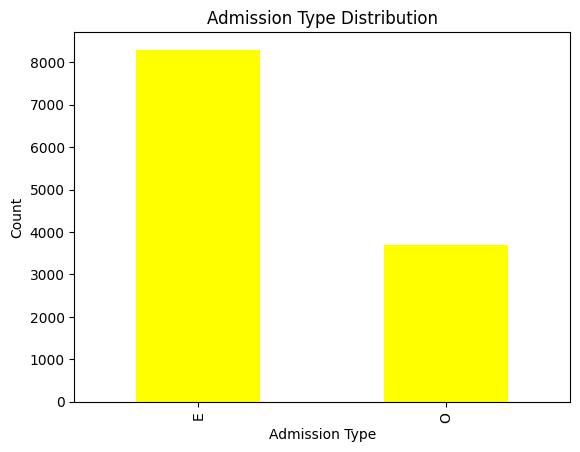

In [ ]:
admission_type_counts = df['admission_type'].value_counts()
print("Admission Type Distribution:\n", admission_type_counts)

# Plot
admission_type_counts.plot(kind='bar', title="Admission Type Distribution", color= 'yellow')
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.show()


5. Departments with the highest number of admissions

Department Admissions:
 department
General       7186
Cardiology    4603
Neurology      201
Name: count, dtype: int64


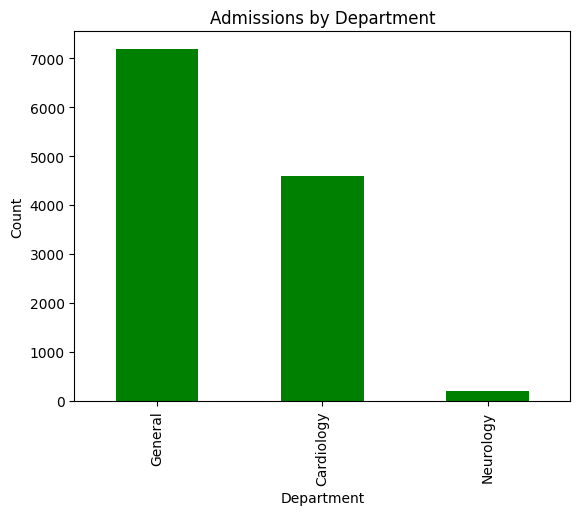

In [ ]:
department_counts = df['department'].value_counts()
print("Department Admissions:\n", department_counts)

# Plot
department_counts.plot(kind='bar', title="Admissions by Department", color= 'green')
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()


# ***Step 4: Remaining EDA Questions***

On which day of the week do most patients get admitted?

Admissions by Day of Week:
 admission_day
Monday       1984
Tuesday      1861
Thursday     1739
Friday       1739
Wednesday    1717
Saturday     1651
Sunday       1299
Name: count, dtype: int64


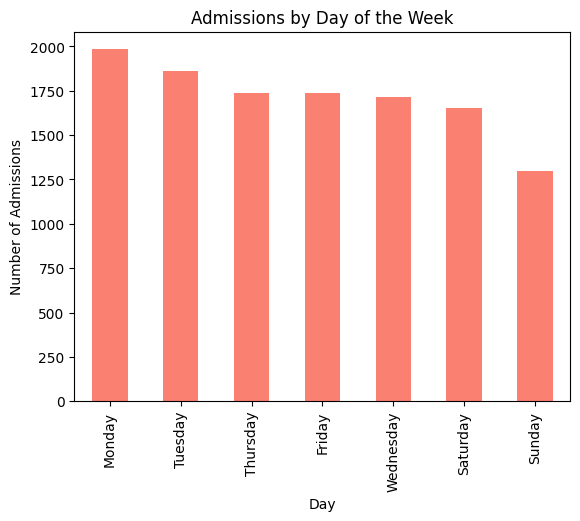

In [ ]:
admission_day_counts = df['admission_day'].value_counts()
print("Admissions by Day of Week:\n", admission_day_counts)

# Plot
admission_day_counts.plot(kind='bar', title="Admissions by Day of the Week", color='salmon')
plt.xlabel("Day")
plt.ylabel("Number of Admissions")
plt.show()


What percentage of patients have visited before (previous_visits > 0)?

In [ ]:
visited_before = df[df['previous_visits'] > 0].shape[0]
total_patients = df.shape[0]
percent_visited_before = (visited_before / total_patients) * 100

print(f"Percentage of patients with previous visits: {percent_visited_before:.2f}%")


Percentage of patients with previous visits: 43.23%


Is there a difference in admission types across genders?

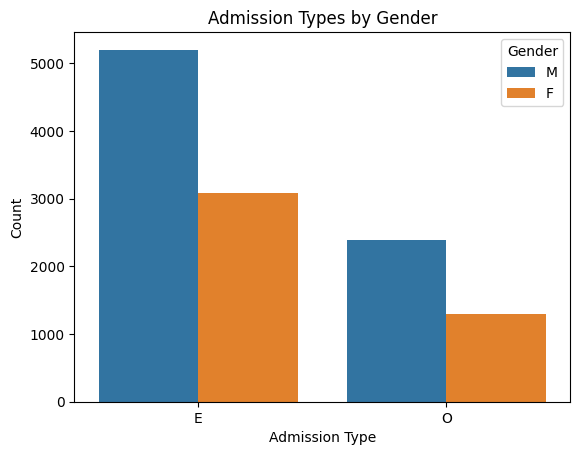

In [ ]:
import seaborn as sns

sns.countplot(data=df, x='admission_type', hue='GENDER')
plt.title("Admission Types by Gender")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


Create 3 visualizations to represent interesting patterns in the data

***A. Age Group vs Admission Type***

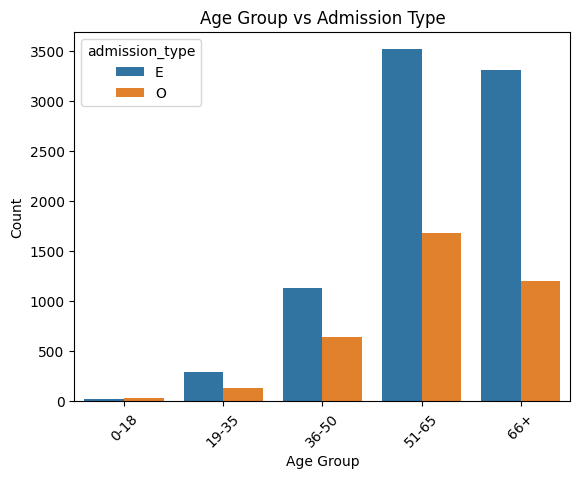

In [ ]:
sns.countplot(data=df, x='AGE', hue='admission_type')
plt.title("Age Group vs Admission Type")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


***B. Department vs Admission Type***

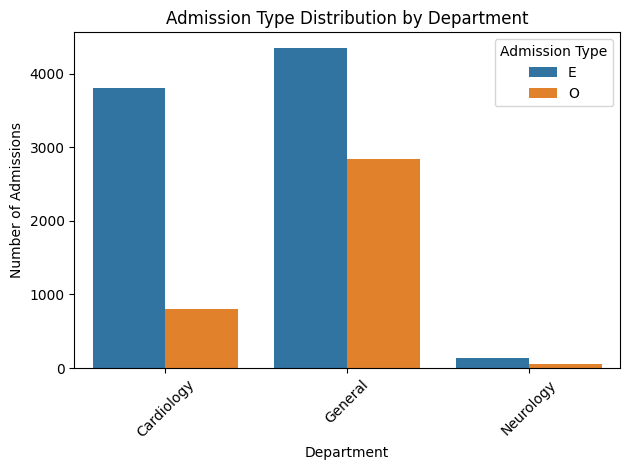

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='department', hue='admission_type')
plt.title("Admission Type Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45)
plt.legend(title="Admission Type")
plt.tight_layout()
plt.show()


***C. Heatmap – Average Previous Visits by Department & Admission Type***

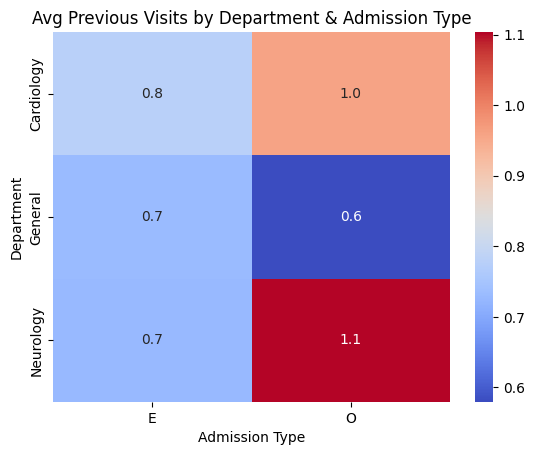

In [ ]:
pivot = df.pivot_table(index='department', columns='admission_type', values='previous_visits', aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Avg Previous Visits by Department & Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Department")
plt.show()
